In [120]:
import pandas as pd
import missingno as msno
import seaborn as sns
sns.set() #для детальной визуализации матриц

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import numpy as np


# ga_hits.csv

## Описание атрибутов:

- session_id — ID визита;

- hit_date — дата события;

- hit_time — время события;

- hit_number — порядковый номер события в рамках сессии;

- hit_type — тип события;

- hit_referer — источник события;

- hit_page_path — страница события;

- event_category — тип действия;

- event_action — действие;

- event_label — тег действия;

- event_value — значение результата действия

#### Общая информация

In [121]:
df1 = pd.read_csv('data/ga_hits.csv')
df1.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [122]:
print(df1.shape)
print(df1.columns)

(15726470, 11)
Index(['session_id', 'hit_date', 'hit_time', 'hit_number', 'hit_type',
       'hit_referer', 'hit_page_path', 'event_category', 'event_action',
       'event_label', 'event_value'],
      dtype='object')


In [123]:
df1[df1.duplicated()]

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value


In [124]:
(df1 == 0).sum() # количество нулевых значений

session_id            0
hit_date              0
hit_time          41137
hit_number            0
hit_type              0
hit_referer           0
hit_page_path         0
event_category        0
event_action          0
event_label           0
event_value           0
dtype: int64

<Axes: >

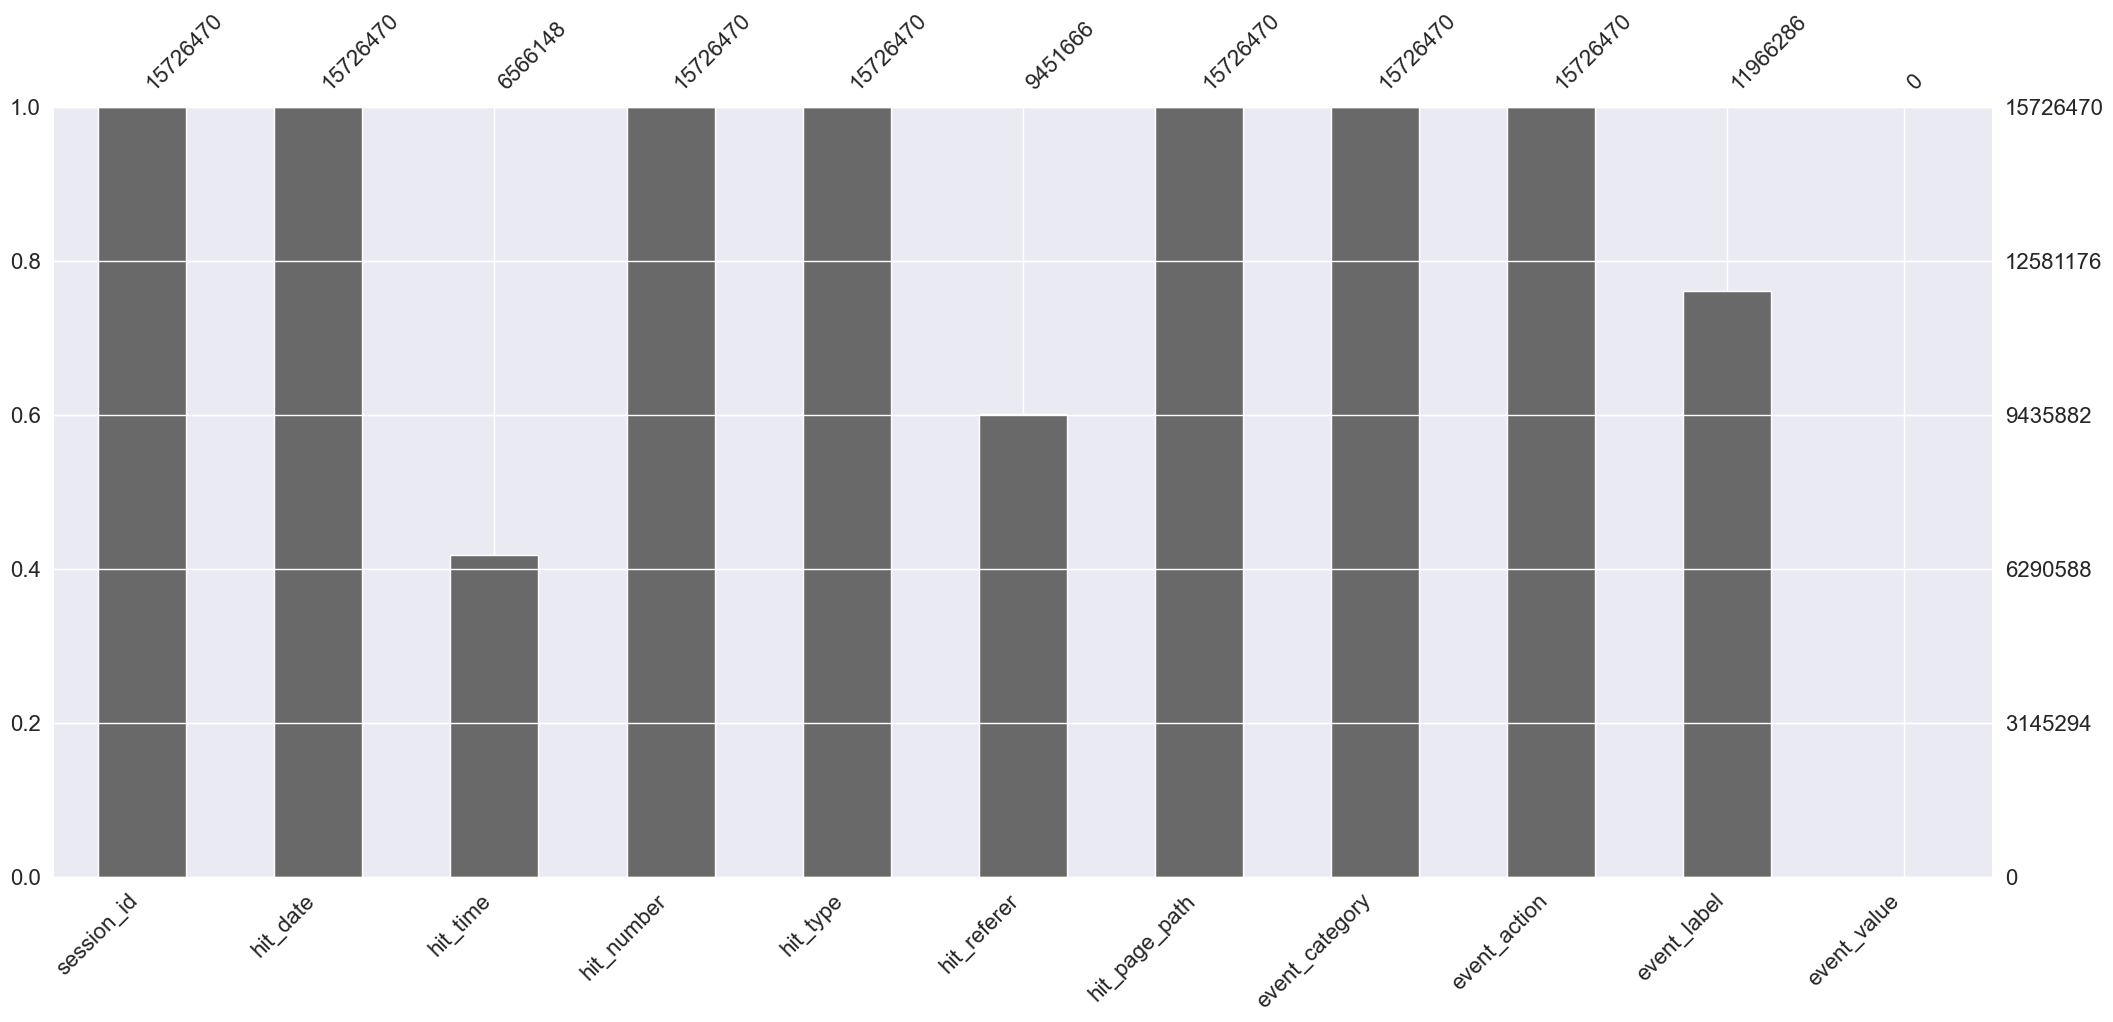

In [125]:
msno.bar(df1)

<Axes: >

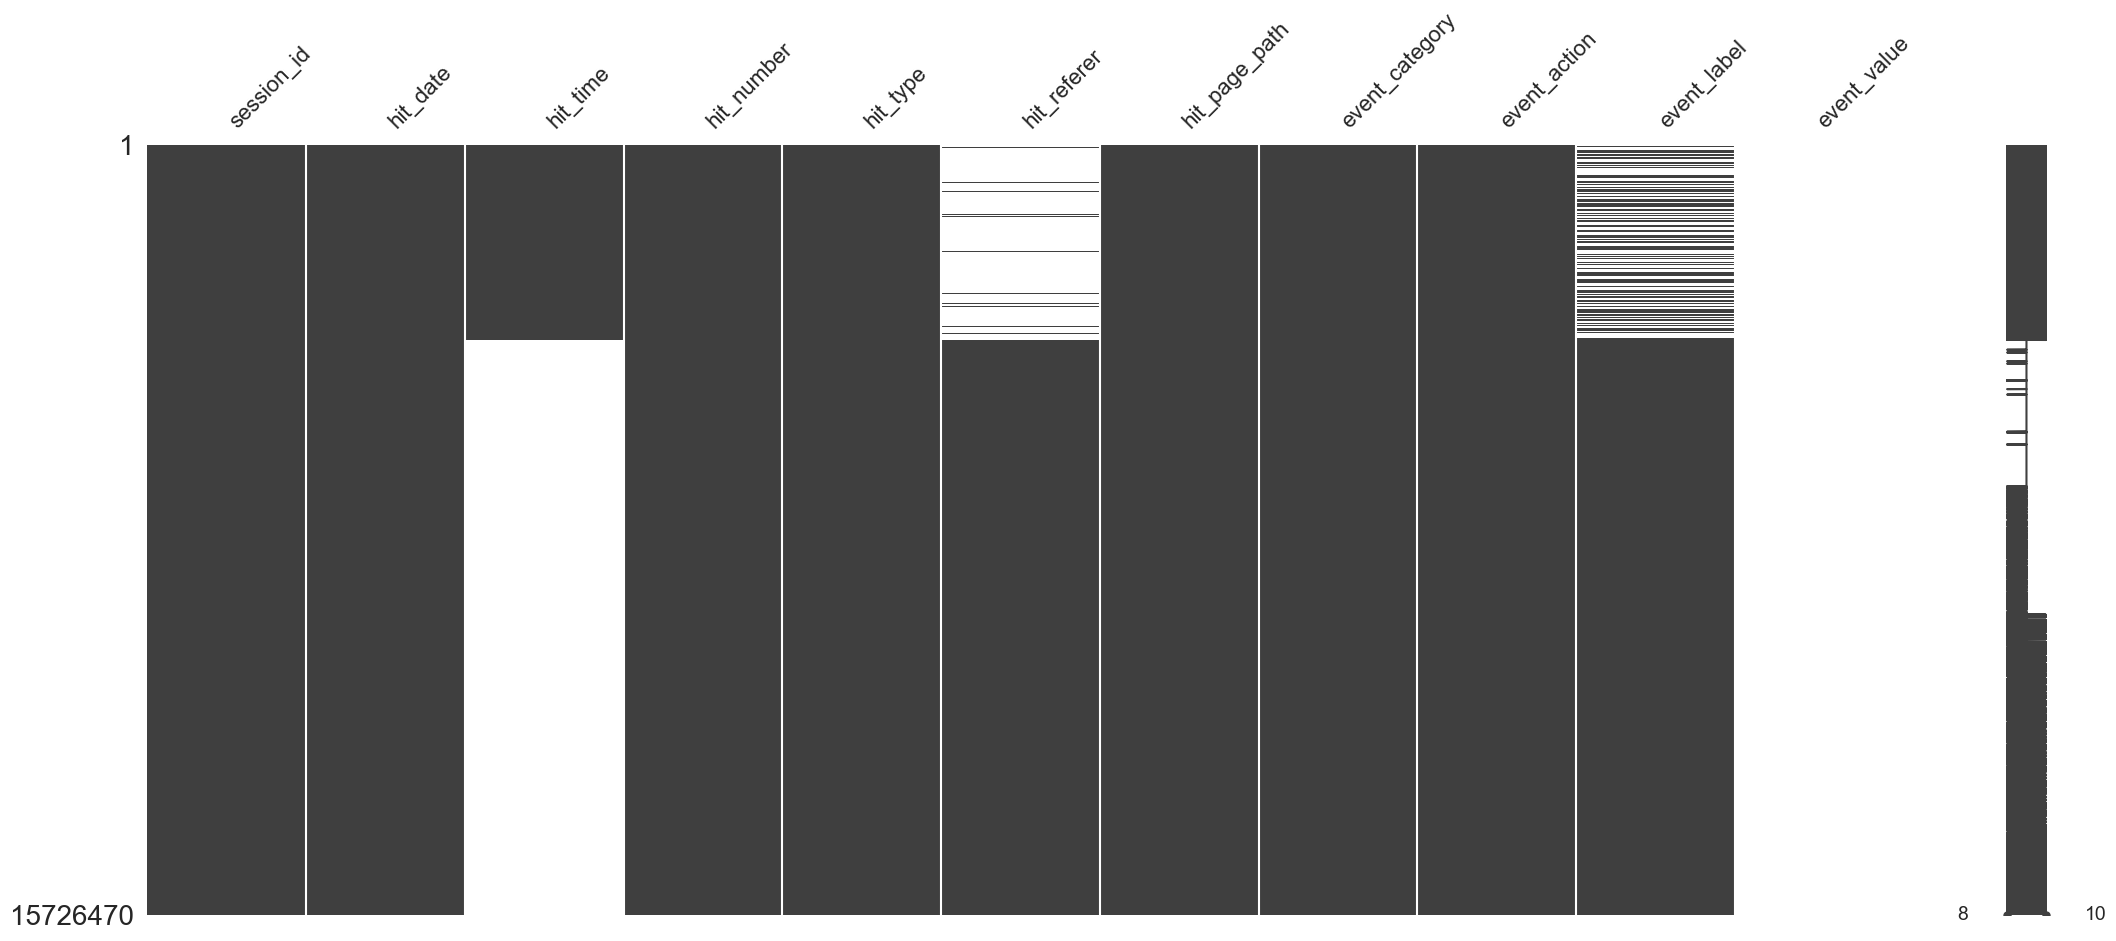

In [126]:
msno.matrix(df1)

In [127]:
df1.dtypes

session_id         object
hit_date           object
hit_time          float64
hit_number          int64
hit_type           object
hit_referer        object
hit_page_path      object
event_category     object
event_action       object
event_label        object
event_value       float64
dtype: object

#### hit_page_path

In [128]:
df1.hit_page_path.value_counts()

hit_page_path
podpiska.sberauto.com/                                                                                                                                                                                                  2793639
sberauto.com/cars?city=1&rental_page=rental_only&rental_car=rental_only&city=18                                                                                                                                         1103484
sberauto.com/cars?utm_source_initial=sbol&utm_medium_initial=banner&utm_campaign_initial=LEoPHuyFvzoNfnzGgfcd&utm_content_initial=vCIpmpaGBnIQhyYNkXqp&city=1&rental_page=rental_only&rental_car=rental_only&city=18     754215
sberauto.com/cars/f28947a1?rental_page=rental_car                                                                                                                                                                        264878
sberauto.com/cars/bf24b977?rental_page=rental_car                                         

#### hit_type

In [129]:
df1.hit_type.value_counts()

hit_type
event    15726470
Name: count, dtype: int64

In [130]:
df1 = df1.drop('hit_type', axis=1)

#### hit_date

Возможно сезонность имеет значение!

In [131]:

df1['hit_date'] = df1['hit_date'].astype('datetime64[ns]')
df1.hit_date.dtype

dtype('<M8[ns]')

In [132]:
df1['year'] = df1['hit_date'].dt.year
df1['month'] = df1['hit_date'].dt.month
df1['day'] = df1['hit_date'].dt.day
df1 = df1.drop(['hit_date'], axis=1)
df1

,session_id,hit_time,hit_number,hit_referer,hit_page_path,event_category,event_action,event_label,event_value,year,month,day
0,5639623078712724064.1640254056.1640254056,597864.0,30,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN,2021,12,23
1,7750352294969115059.1640271109.1640271109,597331.0,41,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN,2021,12,23
2,885342191847998240.1640235807.1640235807,796252.0,49,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN,2021,12,23
3,142526202120934167.1640211014.1640211014,934292.0,46,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN,2021,12,23
4,3450086108837475701.1640265078.1640265078,768741.0,79,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN,2021,12,23
...,...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,810589.0,43,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN,2021,12,23
15726466,7310304587364460692.1640261783.1640261783,904927.0,40,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN,2021,12,23
15726467,8013702685784312179.1640270195.1640270195,2172865.0,43,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN,2021,12,23
15726468,8021505554734405918.1640257821.1640257821,713325.0,45,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN,2021,12,23


#### hit_time

In [133]:
df1 = df1.drop('hit_time', axis=1)

MemoryError: Unable to allocate 495. MiB for an array with shape (15726470, 11, 3) and data type bool

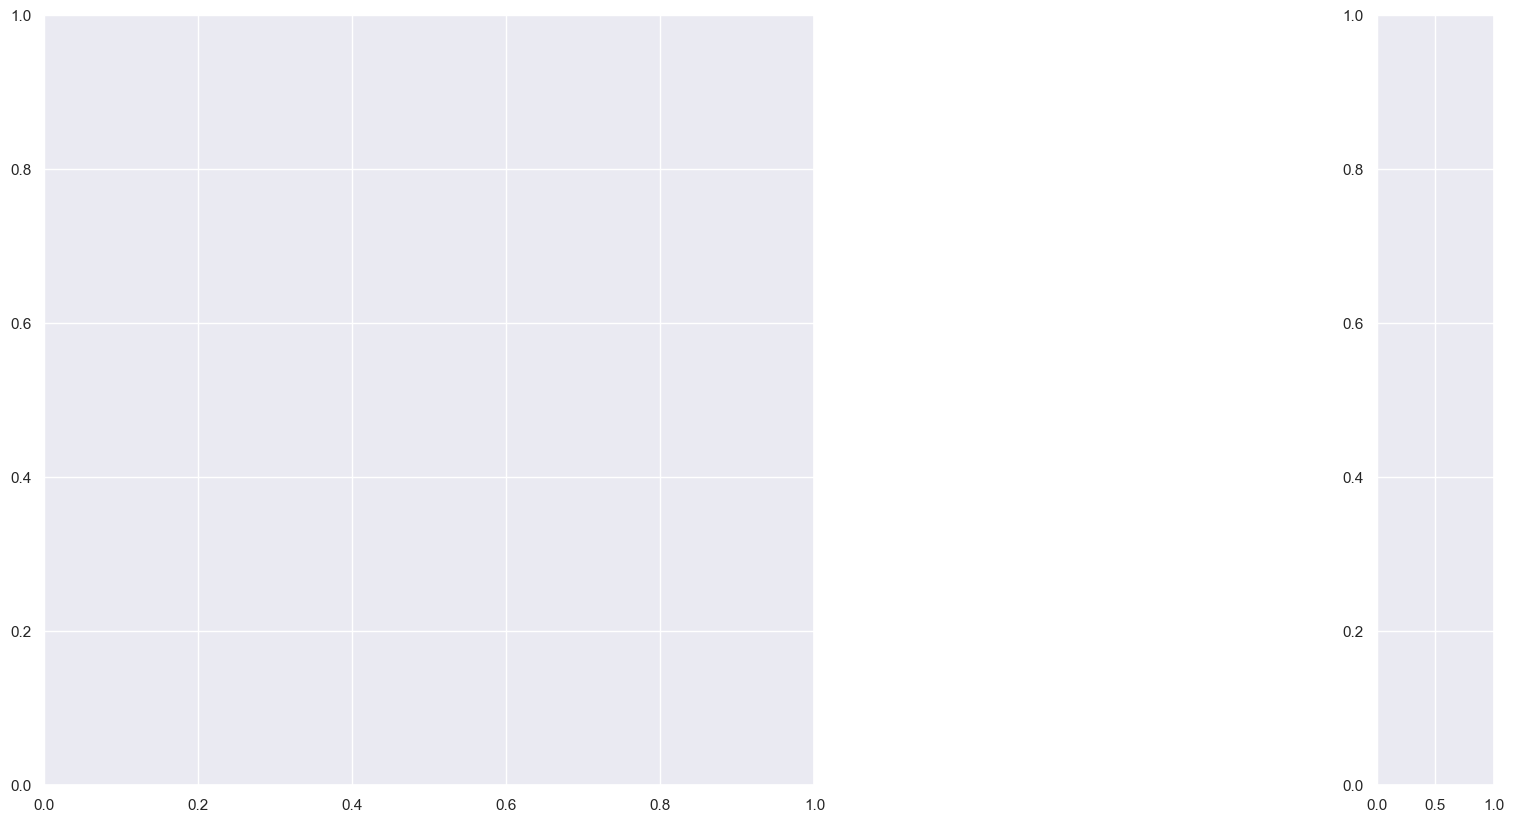

In [134]:
msno.matrix(df1)

#### event_value

In [16]:
df1.event_value.value_counts() 

Series([], Name: count, dtype: int64)

In [17]:
df1 = df1.drop('event_value', axis=1)


#### event_category

In [18]:
# преобразуем столбец event_category в целевой стобец, то есть проведем разметку по стобцу, где целевые действия обозначим 1, нецелевые - 0
dict_event_1 = dict(df1.event_category.value_counts())
print(len(dict_event_1))
keys_event = list(dict_event_1.keys())
len(keys_event)

52


52

In [19]:
value_event_1_markup = [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
#value_event_1_0_markup = [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
#len(value_event_1_0_markup)

In [20]:
print("Все :", len(value_event_1_markup))
print("Нецелевые :",len(value_event_1_markup) - sum(value_event_1_markup))
print("Целевые :", sum(value_event_1_markup))

Все : 52
Нецелевые : 36
Целевые : 16


In [21]:
categories = pd.DataFrame(value_event_1_markup, columns=['event_categories_markup'])
keys = pd.DataFrame(keys_event, columns=['event_category'])
# Объединяем оригинальный DataFrame и закодированный DataFrame
result_event_mkp = pd.concat([keys['event_category'], categories], axis=1)
result_event_mkp

,event_category,event_categories_markup
0,card_web,0
1,search_form,0
2,sub_page_view,1
3,sub_button_click,0
4,listing_ads,0
5,cars,1
6,sap_search_form,1
7,quiz,0
8,auth,0
9,sap_search__form,1


In [22]:
df_merged_categories = pd.merge(df1, result_event_mkp, on='event_category', how='left')
df_merged_categories = df_merged_categories.drop(['event_category'], axis=1)
df_merged_categories

,session_id,hit_number,hit_referer,hit_page_path,event_action,event_label,year,month,day,event_categories_markup
0,5639623078712724064.1640254056.1640254056,30,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz_show,NaN,2021,12,23,0
1,7750352294969115059.1640271109.1640271109,41,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz_show,NaN,2021,12,23,0
2,885342191847998240.1640235807.1640235807,49,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz_show,NaN,2021,12,23,0
3,142526202120934167.1640211014.1640211014,46,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz_show,NaN,2021,12,23,0
4,3450086108837475701.1640265078.1640265078,79,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz_show,NaN,2021,12,23,0
...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,43,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz_show,NaN,2021,12,23,0
15726466,7310304587364460692.1640261783.1640261783,40,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz_show,NaN,2021,12,23,0
15726467,8013702685784312179.1640270195.1640270195,43,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz_show,NaN,2021,12,23,0
15726468,8021505554734405918.1640257821.1640257821,45,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz_show,NaN,2021,12,23,0


In [23]:
df1 = df_merged_categories
df1

,session_id,hit_number,hit_referer,hit_page_path,event_action,event_label,year,month,day,event_categories_markup
0,5639623078712724064.1640254056.1640254056,30,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz_show,NaN,2021,12,23,0
1,7750352294969115059.1640271109.1640271109,41,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz_show,NaN,2021,12,23,0
2,885342191847998240.1640235807.1640235807,49,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz_show,NaN,2021,12,23,0
3,142526202120934167.1640211014.1640211014,46,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz_show,NaN,2021,12,23,0
4,3450086108837475701.1640265078.1640265078,79,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz_show,NaN,2021,12,23,0
...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,43,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz_show,NaN,2021,12,23,0
15726466,7310304587364460692.1640261783.1640261783,40,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz_show,NaN,2021,12,23,0
15726467,8013702685784312179.1640270195.1640270195,43,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz_show,NaN,2021,12,23,0
15726468,8021505554734405918.1640257821.1640257821,45,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz_show,NaN,2021,12,23,0


In [24]:
dict_event = dict(df1.event_action.value_counts())
print(len(dict_event))
dict_event

230


{'view_card': 3558985,
 'view_new_card': 3551009,
 'sub_landing': 1798117,
 'go_to_car_card': 973666,
 'sub_view_cars_click': 791515,
 'search_form_region': 512069,
 'search_form_search_btn': 433748,
 'sap_search_form_cost_to': 356596,
 'showed_number_ads': 326274,
 'pagination_click': 248944,
 'search_form_mark_select': 222652,
 'quiz_show': 214037,
 'search_form_model_select': 211890,
 'sap_search_form_cost_from': 188129,
 'photos_all': 181493,
 'search_form_search_car_type_select': 174877,
 'photos': 158543,
 'sub_car_page': 130310,
 'view_more_click': 109971,
 'search_kpp': 79465,
 'sub_header_link_click': 79192,
 'proactive invitation shown': 75147,
 'sub_offer_click': 69291,
 'start_chat': 66287,
 'listing_ads_sort': 64607,
 'search_form_rental': 59150,
 'sub_faq': 56034,
 'quiz_start': 49097,
 'sub_view_faq_click': 43232,
 'search_form_cost_to': 41386,
 'analystlabel': 40441,
 'start_auth': 39319,
 'search_body_type': 39052,
 'sub_car_claim_click': 37928,
 'search_form_model_mul

In [25]:
df1 = df1.drop(['event_action'], axis=1)
df1

,session_id,hit_number,hit_referer,hit_page_path,event_label,year,month,day,event_categories_markup
0,5639623078712724064.1640254056.1640254056,30,NaN,sberauto.com/cars?utm_source_initial=google&ut...,NaN,2021,12,23,0
1,7750352294969115059.1640271109.1640271109,41,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,NaN,2021,12,23,0
2,885342191847998240.1640235807.1640235807,49,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,NaN,2021,12,23,0
3,142526202120934167.1640211014.1640211014,46,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,NaN,2021,12,23,0
4,3450086108837475701.1640265078.1640265078,79,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,NaN,2021,12,23,0
...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,43,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,NaN,2021,12,23,0
15726466,7310304587364460692.1640261783.1640261783,40,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,NaN,2021,12,23,0
15726467,8013702685784312179.1640270195.1640270195,43,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,NaN,2021,12,23,0
15726468,8021505554734405918.1640257821.1640257821,45,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,NaN,2021,12,23,0


In [26]:
key = [k for k in dict_event_1 if dict_event_1[k] < 100 ]
len(key)

18

#### event_label

In [27]:
df1.event_label.value_counts()

event_label
KclpemfoHstknWHFiLit    6505447
hAHqGICPFQiPwtzubOzs    1284914
OHfyUfDKdPgBdvelDlfG     626554
pzAKUYdRKNEUXxxBFUPX     358915
ghOrjqpgskpGHSFfBBsi     342500
                         ...   
iFTveknOEiHmdgIHHqBZ          1
WKfoFxrMANSjHQMIhCZr          1
RAJXTkPWctNbMZubUIng          1
jRptuMMybqHerOxplPYo          1
aNlmojNIfsJaXKZHCDiU          1
Name: count, Length: 39825, dtype: int64

In [28]:
df1.event_label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15726470 entries, 0 to 15726469
Series name: event_label
Non-Null Count     Dtype 
--------------     ----- 
11966286 non-null  object
dtypes: object(1)
memory usage: 120.0+ MB


In [29]:
df1 = df1[df1.event_label.notna()]
df1.event_label.info()

<class 'pandas.core.series.Series'>
Index: 11966286 entries, 1705 to 15726347
Series name: event_label
Non-Null Count     Dtype 
--------------     ----- 
11966286 non-null  object
dtypes: object(1)
memory usage: 182.6+ MB


In [30]:
# Считаем количество каждого значения в столбце 'event_label'
counts = df1.event_label.value_counts()

# Получаем значения, которые встречаются ровно один раз
unique_labels = counts[counts == 1].index
unique_labels_no = counts[counts != 1].index
# Фильтруем DataFrame, оставляя только строки с уникальными значениями
result = df1[df1.event_label.isin(unique_labels)]
result_no = df1[df1.event_label.isin(unique_labels_no)]

print(len(result))
print(len(result_no))

print(len(result)/ len(result_no))


24131
11942155
0.002020657075712047


# ga_sessions.csv

## Описание атрибутов:

- session_id — ID визита;

- client_id — ID посетителя;

- visit_date — дата визита;

- visit_time — время визита;

- visit_number — порядковый номер визита клиента;

- utm_source — канал привлечения;

- utm_medium — тип привлечения;

- utm_campaign — рекламная кампания;

- utm_keyword — ключевое слово;

- device_category — тип устройства;

- device_os — ОС устройства;

- device_brand — марка устройства;

- device_model — модель устройства;

- device_screen_resolution — разрешение экрана

- device_browser — браузер;

- geo_country — страна;

- geo_city — город

### Общая информация

In [31]:
df2 = pd.read_csv('data/ga_sessions.csv')
df2.head(20)

C:\Users\Redmi\AppData\Local\Temp\ipykernel_12528\360673337.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('data/ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x812,Safari,Russia,Saint Petersburg
6,9055455318486370642.1640843788.1640843788,2108387490.164084,2021-12-30,08:56:28,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,NaN,602x1029,YaBrowser,Russia,Saint Petersburg
7,9055461992850812764.1626107740.1626107740,2108389044.162611,2021-07-12,19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,360x640,Chrome,Russia,Saint Petersburg
8,9055462349345527315.1638536723.1638536723,2108389127.163854,2021-12-03,16:05:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,390x844,Safari,Russia,Moscow
9,9055466554104774132.1624800757.1624800757,2108390106.16248,2021-06-27,16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x915,Chrome,Russia,Moscow


In [32]:
df2.shape

(1860042, 18)

In [33]:
df2[df2.duplicated()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city


In [34]:
(df2 == 0).sum() # количество нулевых значений

session_id                  0
client_id                   0
visit_date                  0
visit_time                  0
visit_number                0
utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
utm_keyword                 0
device_category             0
device_os                   0
device_brand                0
device_model                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
dtype: int64

<Axes: >

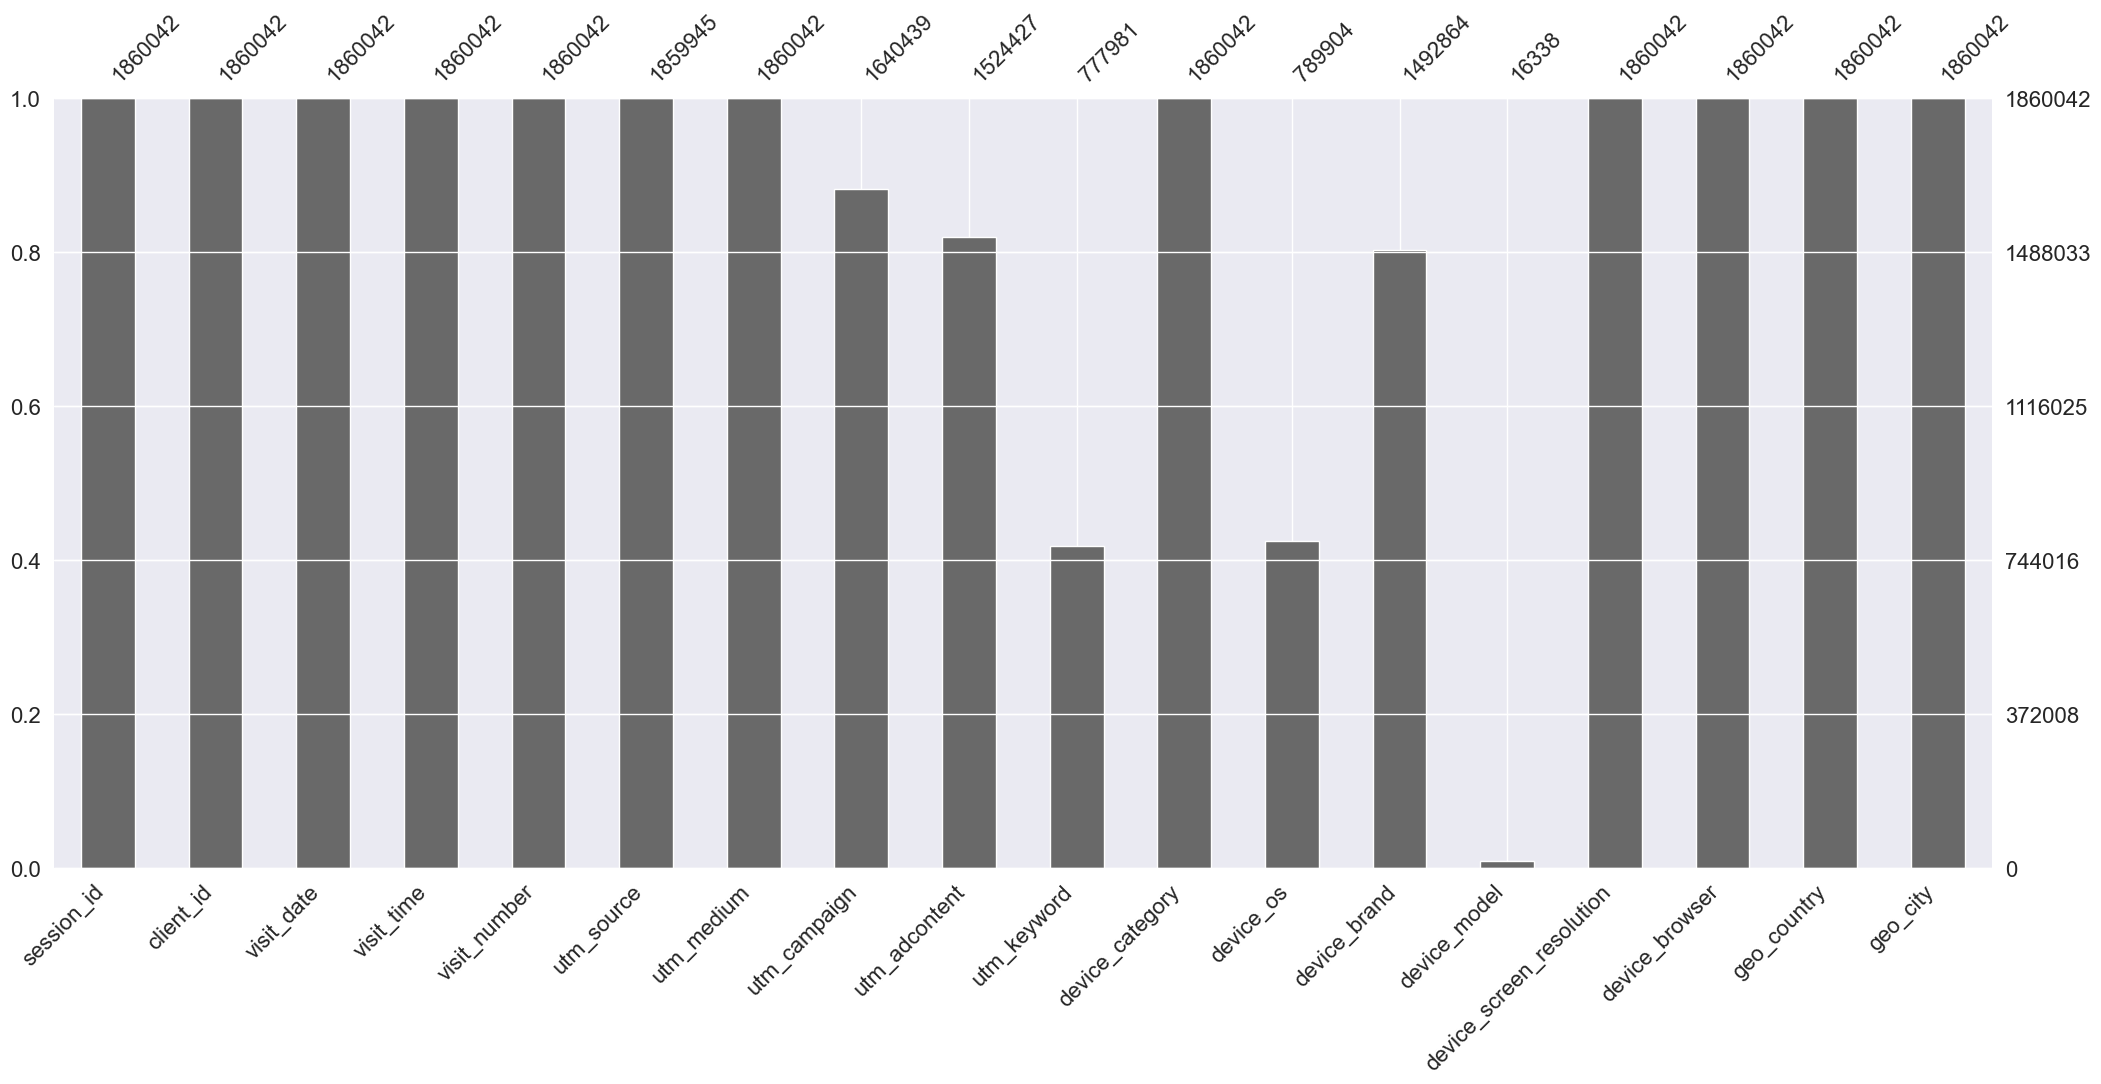

In [35]:
msno.bar(df2)

<Axes: >

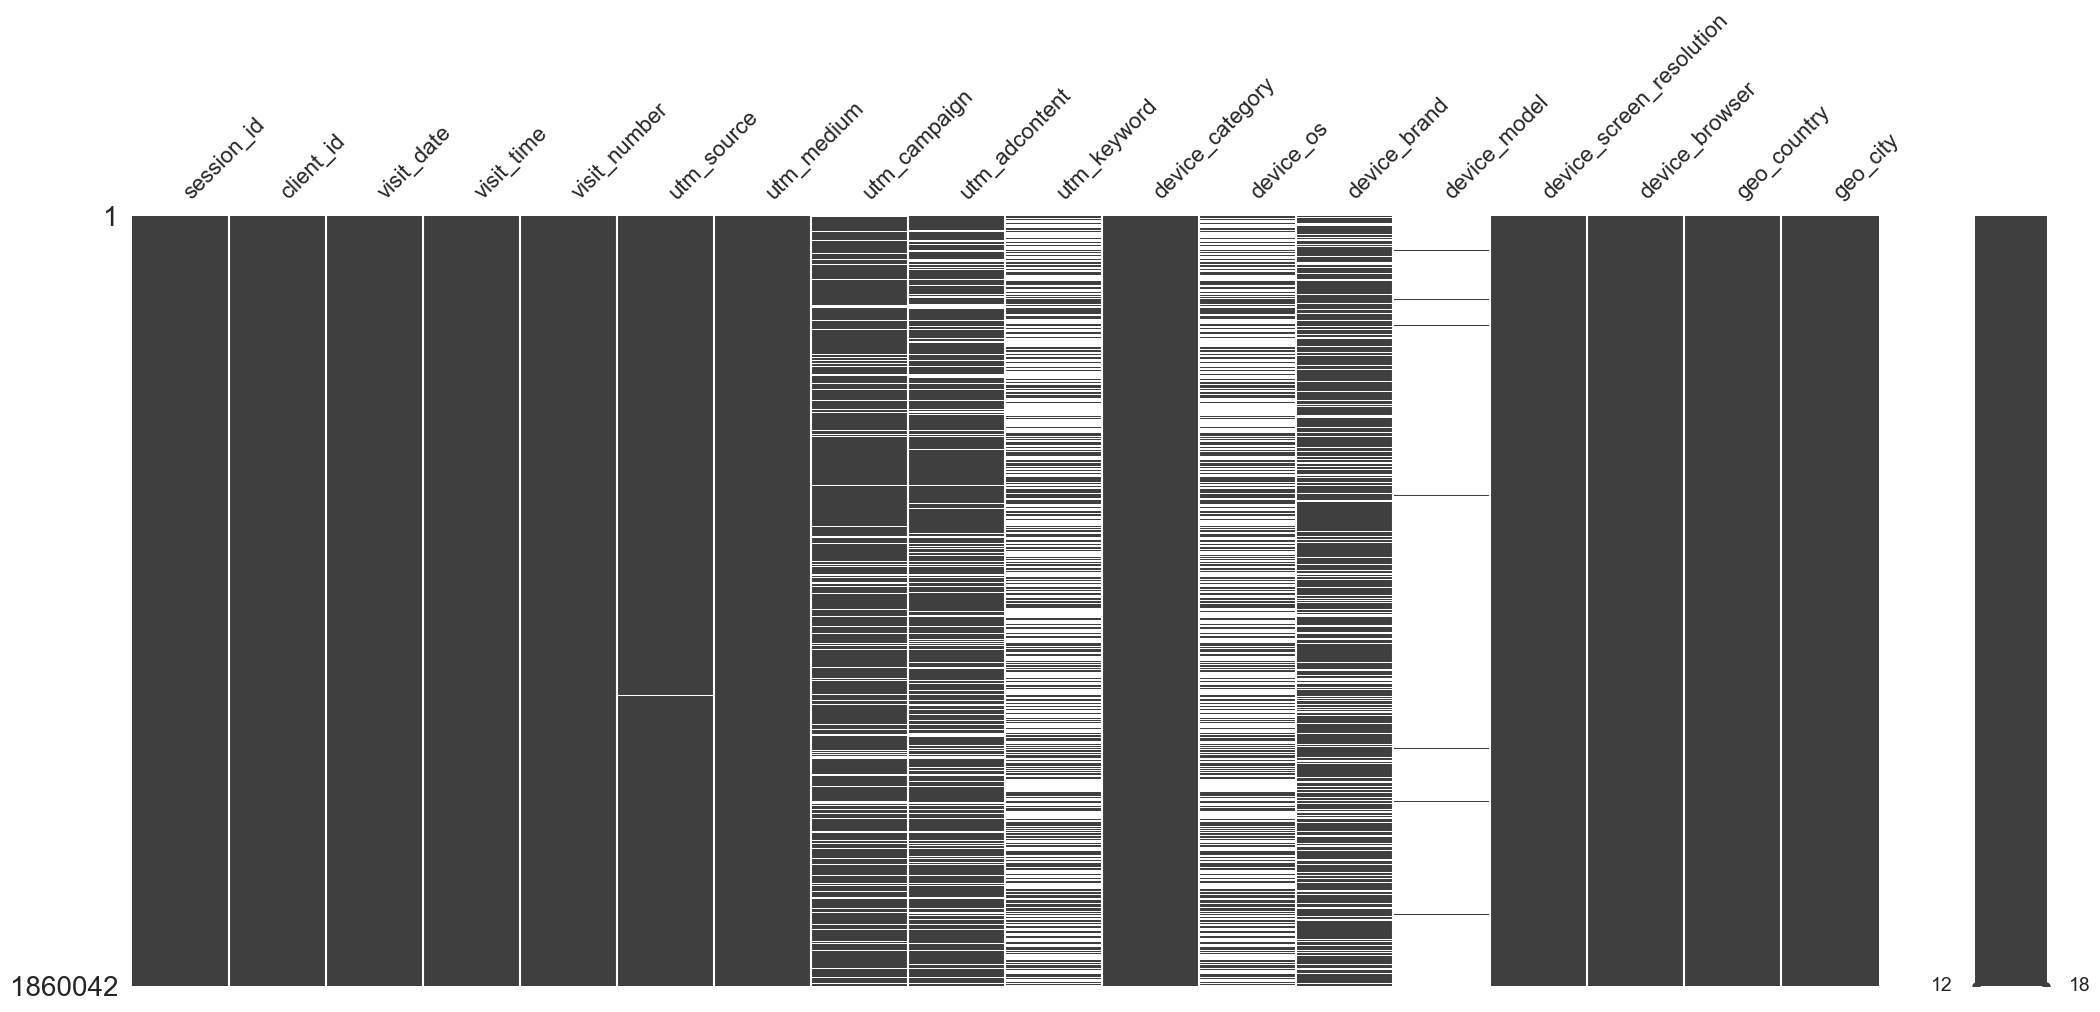

In [36]:
msno.matrix(df2)

In [37]:
df2.dtypes

session_id                  object
client_id                   object
visit_date                  object
visit_time                  object
visit_number                 int64
utm_source                  object
utm_medium                  object
utm_campaign                object
utm_adcontent               object
utm_keyword                 object
device_category             object
device_os                   object
device_brand                object
device_model                object
device_screen_resolution    object
device_browser              object
geo_country                 object
geo_city                    object
dtype: object

#### device_screen_resolution

In [38]:
# Разделяем значения в столбце по символу '*'
df2[['screen_width', 'screen_height']] = df2['device_screen_resolution'].str.split('x', expand=True)



In [39]:
df2= df2.drop(['device_screen_resolution'], axis=1)
df2

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_browser,geo_country,geo_city,screen_width,screen_height
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,Chrome,Russia,Zlatoust,360,720
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,Samsung Internet,Russia,Moscow,385,854
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,Chrome,Russia,Krasnoyarsk,360,720
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,Chrome,Russia,Moscow,393,786
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,Chrome,Russia,Moscow,393,786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,Chrome,Russia,Moscow,1920,1080
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,Safari,Russia,Stavropol,390,844
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,Safari,Russia,Moscow,375,667
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,Chrome,Russia,Chelyabinsk,393,851


#### device_model

In [40]:
df2 = df2.drop(['device_model'], axis=1)
df2.head(1)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,Chrome,Russia,Zlatoust,360,720


#### device_brand

In [41]:
print("Соотношение заполненых ячеек ко всем ячейкам:", len(df2[df2.device_brand.notna()])/len(df2.device_brand))

Соотношение заполненых ячеек ко всем ячейкам: 0.8025969306069433


#### device_os

In [42]:
print("Соотношение заполненых ячеек ко всем ячейкам:", len(df2[df2.device_os.notna()])/len(df2.device_os))

Соотношение заполненых ячеек ко всем ячейкам: 0.42466998057033123


Так как заполненность стобца менее 70%, то восстановление данных внесет отрицательное влияние на работу модели. Следовательно данный столбец лучше удалить. В перспективе можно восстановить столбец через device_brand, но в baseline не будем восстанавливать.

In [43]:
df2 = df2.drop('device_os', axis=1)

#### utm_keyword

In [44]:
print("Соотношение заполненых ячеек ко всем ячейкам:", len(df2[df2.utm_keyword.notna()])/len(df2.utm_keyword))

Соотношение заполненых ячеек ко всем ячейкам: 0.4182599102600909


In [45]:
df2.utm_keyword.value_counts()

utm_keyword
puhZPIYqKXeFPaUviSjo    506819
aXQzDWsJuGXeBXexNHjc     24241
pHqgLcdBQPSLcrTpLkdr     13767
ITfrGJNwVsHBGJMAKoct     13353
hAmNSZmQkKQKAjZEGlgb     11297
                         ...  
XsuVVTgiDIxZtndPjvDm         1
WhaUakldaAmpLumfaADO         1
nJVPLgfxsBtPAXttNVDI         1
nwKBdMZKktIQFvhZwbFe         1
fcXWTQaKfxbkBkBnzLhK         1
Name: count, Length: 1219, dtype: int64

In [46]:
df2 = df2.drop('utm_keyword', axis=1)

<Axes: >

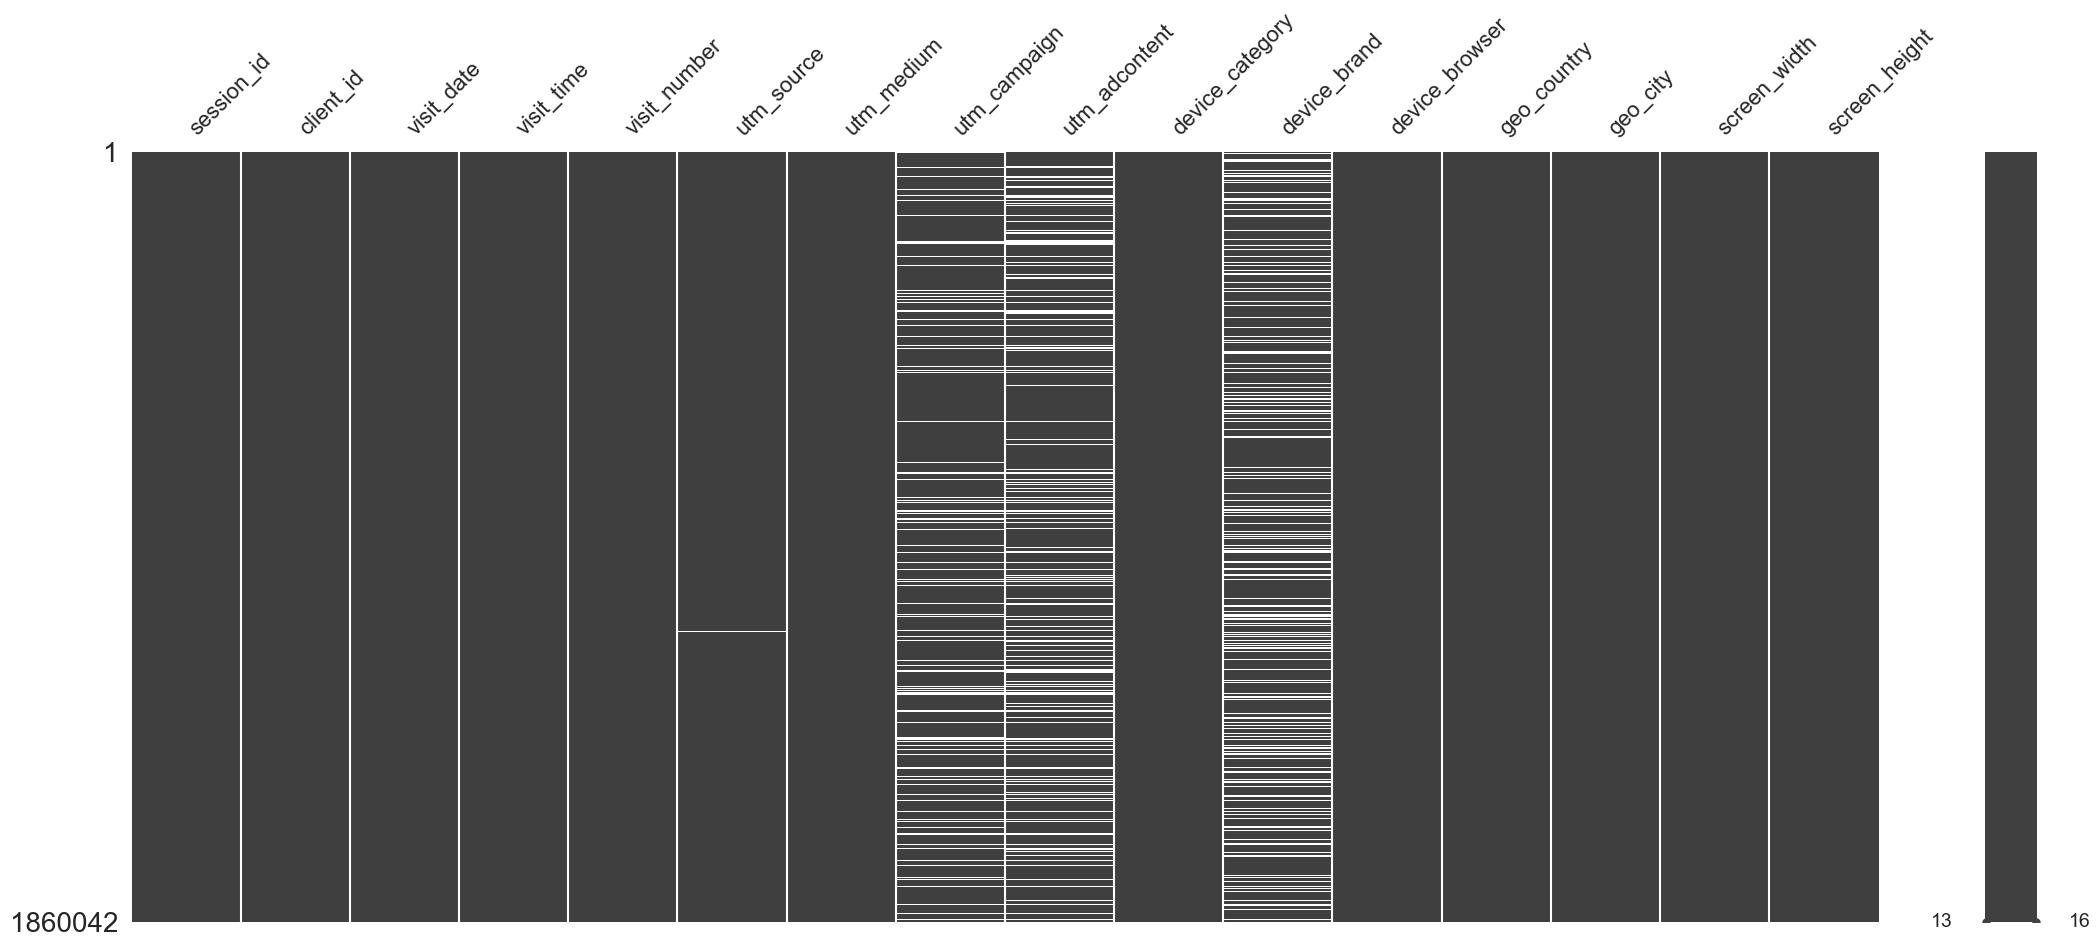

In [47]:
msno.matrix(df2)

#### utm_adcontent

In [48]:
print("Соотношение заполненых ячеек ко всем ячейкам:", len(df2[df2.utm_adcontent.notna()])/len(df2.utm_adcontent))

Соотношение заполненых ячеек ко всем ячейкам: 0.819565902275325


In [49]:
df2.utm_adcontent.value_counts()

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    1006599
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
LLfCasrxQzJIyuldcuWy      24222
                         ...   
ryswqHdLvbezpDLjokYF          1
gQEnaeQmOHisHSTEyzhp          1
PlanrlymnpCeYvUrUTVJ          1
WbXQsVOKLOcJrHikuQTZ          1
oJivRDNIrrOckRBIKOtG          1
Name: count, Length: 286, dtype: int64

In [50]:
df2 = df2.drop(['utm_adcontent'], axis=1)

#### utm_campaign(!)

In [51]:
print("Соотношение заполненых ячеек ко всем ячейкам:", len(df2[df2.utm_campaign.notna()])/len(df2.utm_campaign))

Соотношение заполненых ячеек ко всем ячейкам: 0.8819365369169083


In [52]:
df2.utm_campaign.value_counts()

utm_campaign
LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
gecBYcKZCPMcVYdSSzKP    134042
TmThBvoCcwkCZZUWACYq     26597
                         ...  
cqgnjDbqrtCipVvzhxqa         1
AdtHYglxfCpTpwZeTAuW         1
pcvPxfVFaAmhwFmvIeYd         1
qPDTdivQVeflLjTYIJnG         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 412, dtype: int64

In [53]:
df2[df2.utm_campaign.isna()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,device_category,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Chrome,Russia,Moscow,393,786
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Xiaomi,Chrome,Russia,Moscow,393,786
14,9055469620715506713.1636559415.1636559415,2108390820.162888,2021-11-10,18:50:15,4,SzZERoLMmrEUEhDaYcyN,cpc,NaN,mobile,Samsung,Android Webview,Russia,Saint Petersburg,412,869
27,9055504865227535872.1639282176.1639282176,2108399026.163928,2021-12-12,07:09:36,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,mobile,Samsung,Chrome,Russia,Moscow,385,854
38,905553874150070422.1639028922.1639028922,210840691.163903,2021-12-09,08:48:42,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,mobile,Apple,Safari,Russia,Moscow,375,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859982,9055195915335919645.1630169119.1630169119,2108327093.163017,2021-08-28,19:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,mobile,Xiaomi,YaBrowser,Russia,Moscow,393,873
1859987,9055216346490282940.1625105400.1625105400,2108331850.16251,2021-07-01,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,desktop,NaN,Chrome,Russia,Moscow,1920,1080
1860018,9055329372850890545.1626351420.1626351420,2108358166.162635,2021-07-15,15:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,desktop,NaN,YaBrowser,Russia,Moscow,1920,1080
1860020,9055329372850890545.1629287172.1629287172,2108358166.162635,2021-08-18,14:00:00,3,BHcvLfOaCWvWTykYqHVe,cpc,NaN,desktop,NaN,YaBrowser,Russia,Moscow,1920,1080


In [54]:
value_campaign = df2.utm_campaign.value_counts()
value_campaign = value_campaign[0:20]
value_campaign

utm_campaign
LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
gecBYcKZCPMcVYdSSzKP    134042
TmThBvoCcwkCZZUWACYq     26597
XHNUiSKKGTEpSAlaVMFQ     24524
okTXSMadDkjvntEHzIjp     24511
SgIUDYUKnyWHVowUOqid     22841
sbJRYgVfvcnqKJNDDYIr     20188
LwJZxKuWmvOhPsaCeRjG     17615
RoDitORHdzGfGhNCyEMy     15706
bxOTvPtyGSdUrbwoXCPO     15415
zxoiLxhuSIFrCeTLQVWZ     12370
bJJuEXRheRIxXEaYIXqM     12232
YCKgTzTDywjcWyQudGch     12041
nSReTmyFtbSjlPrTKoaX     11611
QEejXfOCtOMFLZqIPApp     10172
vRLTQQKAsFQMxbcHGPhu      9461
jvsVVQVKRfBIqBDBuCkq      7950
eimRuUrNhZLAYcwRrNXu      7784
Name: count, dtype: int64

In [55]:
df2[df2.utm_campaign.isna()].shape

(219603, 15)

In [56]:
# Шаг 1: Выбираем все уникальные значения из столбца 
unique_values = value_campaign

# Шаг 2: Заменяем все NaN в столбце 'utm_campaign' на случайные значения из 'value_campaign'
mask = df2['utm_campaign'].isna()  # создаем маску для NaN значений
df2.loc[mask, 'utm_campaign'] = np.random.choice(unique_values, size=mask.sum())  # замена


# Вывод результата
df2[df2.utm_campaign.isna()].shape

(0, 15)

#### Проверка заполненных столбцов

#####  visit_number(!)

In [57]:
len(df2.visit_number.isna())

1860042

In [58]:
df2[df2.visit_number == '(none)']
df2 = df2.drop(['visit_number'], axis=1)

##### utm_source(!)

In [59]:
df2.utm_source.value_counts()

utm_source
ZpYIoDJMcFzVoPFsHGJL    578290
fDLlAcSmythWSCVMvqvL    300575
kjsLglQLzykiRbcDiGcD    266354
MvfHsxITijuriZxsqZqt    186199
BHcvLfOaCWvWTykYqHVe    116320
                         ...  
GYkgJdhSxirUFPHFiYSe         1
WRHPhoRKhKxaenRCLBfo         1
tjKUGseGMhkLEzdCqBRx         1
wpmatvDuiMutnvmNVPJo         1
BellrslNBZQZaIxVFGXJ         1
Name: count, Length: 293, dtype: int64

In [60]:
df2[df2.utm_source.isna()]

,session_id,client_id,visit_date,visit_time,utm_source,utm_medium,utm_campaign,device_category,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height
77652,1100240274910044288.1640728207.1640728207,256169651.163731,2021-12-29,00:50:07,NaN,(not set),LTuZkdKfxRGVceoWkVyg,mobile,OnePlus,Chrome,Russia,Saint Petersburg,412,892
122841,1303431342277938317.1637250145.1637250145,303478758.1637239949,2021-11-18,18:42:25,NaN,Sbol_catalog,cccMlyVfjXspfaCSrMsO,mobile,Apple,Safari,Russia,Balashikha,375,667
136220,1364914954463538089.1637595059.1637595059,317794027.16344,2021-11-22,18:30:59,NaN,(not set),LTuZkdKfxRGVceoWkVyg,mobile,Xiaomi,YaBrowser,Russia,Moscow,393,851
136221,1364914954463538089.1638478637.1638478637,317794027.16344,2021-12-02,23:57:17,NaN,(not set),LTuZkdKfxRGVceoWkVyg,mobile,Xiaomi,YaBrowser,Russia,Moscow,393,851
139706,1380043242326371104.1637518268.1637518268,321316356.163648,2021-11-21,21:11:08,NaN,(not set),LTuZkdKfxRGVceoWkVyg,mobile,Samsung,Chrome,Russia,Izhevsk,360,740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629120,8025307339522195714.1638678933.1638678933,1868537473.163671,2021-12-05,07:35:33,NaN,(not set),LTuZkdKfxRGVceoWkVyg,mobile,Huawei,Chrome,Russia,Sochi,360,780
1629121,8025307339522195714.1638688249.1638688249,1868537473.163671,2021-12-05,10:10:49,NaN,(not set),LTuZkdKfxRGVceoWkVyg,mobile,Huawei,Chrome,Russia,Krasnodar,360,780
1629122,8025307339522195714.1638954236.1638954236,1868537473.163671,2021-12-08,12:03:56,NaN,(not set),LTuZkdKfxRGVceoWkVyg,mobile,Huawei,Chrome,Ukraine,Pereval's'k,360,780
1732460,848873006059532776.1637459623.1637459623,197643648.16374,2021-11-21,04:53:43,NaN,(not set),LTuZkdKfxRGVceoWkVyg,mobile,Xiaomi,Chrome,Russia,Novosibirsk,360,800


In [61]:
value_campaign = df2.utm_source.value_counts()
# Шаг 1: Выбираем все уникальные значения из столбца
unique_values = value_campaign

# Шаг 2: Заменяем все NaN в столбце 'utm_campaign' на случайные значения из 'value_campaign'
mask = df2['utm_source'].isna()  # создаем маску для NaN значений
df2.loc[mask, 'utm_source'] = np.random.choice(unique_values, size=mask.sum())  # замена

In [62]:
df2[df2.utm_source.isna()]

,session_id,client_id,visit_date,visit_time,utm_source,utm_medium,utm_campaign,device_category,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height


In [63]:
df2[df2.utm_source == '(none)']

,session_id,client_id,visit_date,visit_time,utm_source,utm_medium,utm_campaign,device_category,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height


##### utm_medium (!)

In [64]:
df2[df2.utm_medium == '(none)'].shape

(300575, 14)

In [65]:
# Шаг 1: Выбираем все уникальные значения в столбце 'utm_medium', кроме '(none)'
unique_values = df2['utm_medium'].loc[df2['utm_medium'] != '(none)'].unique()

# Шаг 2: Заменяем все вхождения '(none)' на случайное значение из уникальных значений
mask = df2['utm_medium'] == '(none)'  # создаем маску для значений '(none)'
df2.loc[mask, 'utm_medium'] = np.random.choice(unique_values, size=mask.sum())  # замена

# Вывод результата
df2[df2.utm_medium == '(none)'].shape

(0, 14)

In [66]:
df2[df2.utm_medium == '(not set)'].shape

(5933, 14)

In [67]:
# Шаг 1: Выбираем все уникальные значения в столбце 'utm_medium', кроме '(none)'
unique_values = df2['utm_medium'].loc[df2['utm_medium'] != '(not set)'].unique()

# Шаг 2: Заменяем все вхождения '(none)' на случайное значение из уникальных значений
mask = df2['utm_medium'] == '(not set)'  # создаем маску для значений '(none)'
df2.loc[mask, 'utm_medium'] = np.random.choice(unique_values, size=mask.sum())  # замена

# Вывод результата
df2[df2.utm_medium == '(not set)'].shape

(0, 14)

##### device_category 

In [68]:
df2[df2.device_category == '(none)'].shape

(0, 14)

##### device_browser(!)

In [69]:
df2[df2.device_browser == '(none)'].shape

(0, 14)

##### geo_country(!)

In [70]:
df2[df2.geo_country == '(none)'].shape

(0, 14)

##### geo_city(!)

In [71]:
df2[df2.geo_city == '(none)'].shape

(0, 14)

<Axes: >

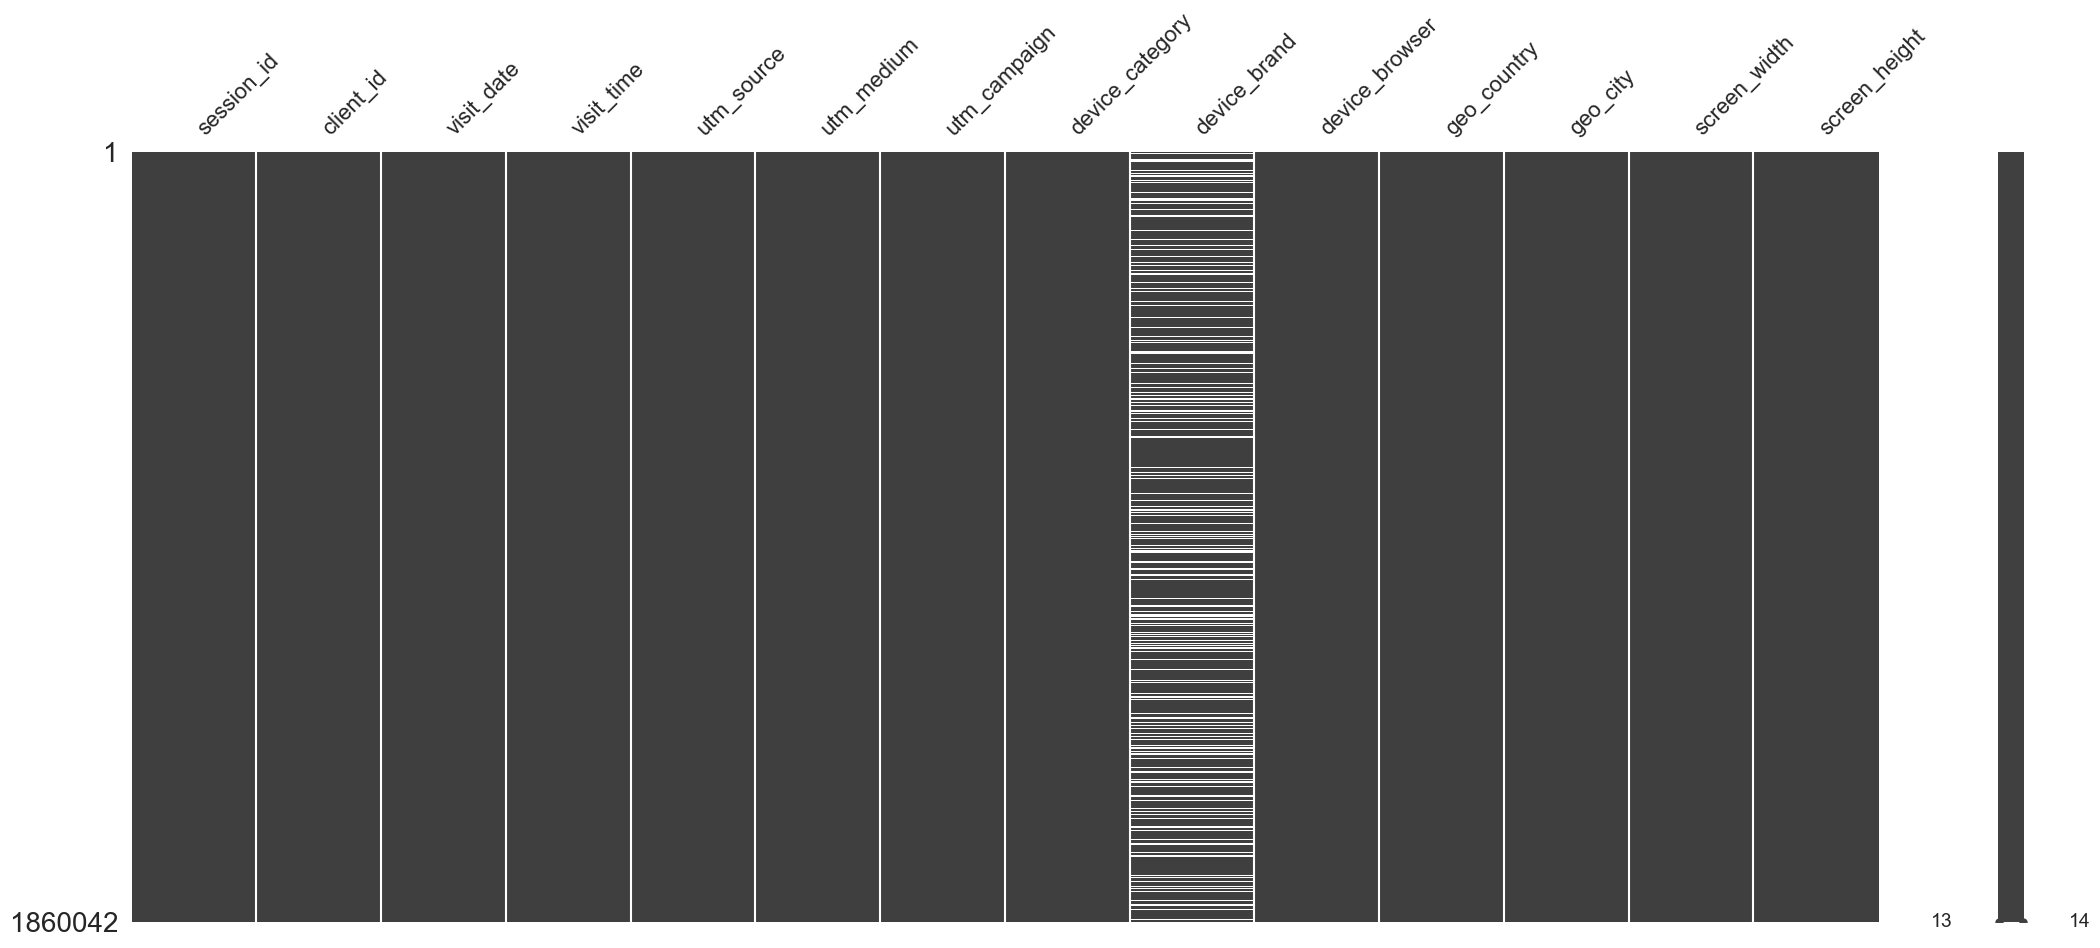

In [72]:
msno.matrix(df2)

In [73]:
df_with_nan = df2[df2.isna().any(axis=1)]
df_with_nan

,session_id,client_id,visit_date,visit_time,utm_source,utm_medium,utm_campaign,device_category,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height
28,9055505230298952295.1638478433.1638478433,2108399111.163848,2021-12-02,23:53:53,fDLlAcSmythWSCVMvqvL,banner,LTuZkdKfxRGVceoWkVyg,desktop,NaN,Chrome,Russia,Balashikha,1536,864
63,9055657327967035032.1629707931.1629707931,2108434524.162971,2021-08-23,11:00:00,nSReTmyFtbSjlPrTKoaX,banner,BVKxkCOHKUOvkpbrLMgZ,desktop,NaN,YaBrowser,Russia,Moscow,1920,1080
64,905565977351442956.1622561294.1622561294,210843509.162256,2021-06-01,18:00:00,fDLlAcSmythWSCVMvqvL,tg,LTuZkdKfxRGVceoWkVyg,desktop,NaN,Chrome,Russia,Moscow,1920,1080
67,9055678214400253418.1636965866.1636965866,2108439387.163696,2021-11-15,11:44:26,fDLlAcSmythWSCVMvqvL,main_polka,LTuZkdKfxRGVceoWkVyg,desktop,NaN,Chrome,Russia,Saint Petersburg,1920,1080
73,9055788191321875859.1626006934.1626006934,2108464993.162601,2021-07-11,15:00:00,fDLlAcSmythWSCVMvqvL,article,LTuZkdKfxRGVceoWkVyg,desktop,NaN,Chrome,Russia,Moscow,1280,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860025,9055354507009984602.1636829278.1636829278,2108364018.163683,2021-11-13,21:47:58,vFcAhRxLfOWKhvxjELkx,organic,okTXSMadDkjvntEHzIjp,desktop,NaN,Firefox,Russia,Balashikha,1366,768
1860027,9055363711117247375.1629176721.1629176721,2108366161.162918,2021-08-17,08:00:00,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,desktop,NaN,Chrome,Russia,(not set),1920,1080
1860029,9055376699099939975.1630766214.1630766214,2108369185.163077,2021-09-04,17:00:00,fDLlAcSmythWSCVMvqvL,nkp,LTuZkdKfxRGVceoWkVyg,desktop,NaN,Chrome,Russia,Khimki,1920,1080
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,BHcvLfOaCWvWTykYqHVe,cpc,11611,desktop,NaN,Chrome,Russia,Moscow,1920,1080


### Кодирование данных

In [74]:
def encode_device_category(df, column_name):
    # Приводим значения столбца к строковому типу
    df[column_name] = df[column_name].astype(str)

    # Получаем уникальные значения в виде DataFrame, включая NaN
    unique_values = df[[column_name]].drop_duplicates()

    # Разделяем значения с NaN (если есть)
    nan_values = unique_values[unique_values[column_name].isna()]

    # Применяем Binary Encoding к уникальным значениям, игнорируя NaN
    encoder = ce.BinaryEncoder(cols=[column_name])
    binary_encoded = encoder.fit_transform(unique_values.dropna())

    # Объединяем все закодированные строки в один столбец
    binary_encoded[column_name + '_encoded'] = binary_encoded.astype(str).agg(''.join, axis=1)

    # Создаем DataFrame с оригинальными и закодированными значениями
    result_df = pd.concat([unique_values.dropna(), binary_encoded[[column_name + '_encoded']]], axis=1)

    # Переименование колонок для удобства
    result_df.columns = [column_name, column_name + '_encoded']

    # Объединяем оригинальный DataFrame с результатами кодирования
    df_merged = pd.merge(df, result_df, on=column_name, how='left')

    # Проверка на NaN значения и вывод их в отдельный DataFrame
    df_with_nan = df_merged[df_merged[column_name + '_encoded'].isna()]

    # Для строк с NaN выводим оригинальные значения, если они не закодированы
    df_merged[column_name + '_encoded'] = df_merged[column_name + '_encoded'].fillna(df_merged[column_name])

    return df_merged.drop(columns=[column_name]), df_with_nan


In [75]:
df2.head(2)

,session_id,client_id,visit_date,visit_time,utm_source,utm_medium,utm_campaign,device_category,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Chrome,Russia,Zlatoust,360,720
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Samsung,Samsung Internet,Russia,Moscow,385,854


#### utm_source

In [76]:
# Пример использования
df2_encoded, df2_nan = encode_device_category(df2, 'utm_source')

# Посмотреть строки с NaN
df2_nan


,session_id,client_id,visit_date,visit_time,utm_source,utm_medium,utm_campaign,device_category,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height,utm_source_encoded


In [77]:
df2 = df2_encoded
df2_encoded

,session_id,client_id,visit_date,visit_time,utm_medium,utm_campaign,device_category,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height,utm_source_encoded
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Chrome,Russia,Zlatoust,360,720,000000001
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Samsung,Samsung Internet,Russia,Moscow,385,854,000000010
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Chrome,Russia,Krasnoyarsk,360,720,000000001
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,cpc,7950,mobile,Xiaomi,Chrome,Russia,Moscow,393,786,000000011
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,cpc,12370,mobile,Xiaomi,Chrome,Russia,Moscow,393,786,000000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,cpc,11611,desktop,NaN,Chrome,Russia,Moscow,1920,1080,000001000
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,organic,LTuZkdKfxRGVceoWkVyg,mobile,Apple,Safari,Russia,Stavropol,390,844,000000101
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,cpc,LTuZkdKfxRGVceoWkVyg,mobile,Apple,Safari,Russia,Moscow,375,667,000000101
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Xiaomi,Chrome,Russia,Chelyabinsk,393,851,000000001


#### utm_medium

In [78]:
# Пример использования
df2_encoded, df2_nan = encode_device_category(df2, 'utm_medium')

# Посмотреть строки с NaN
df2_nan

,session_id,client_id,visit_date,visit_time,utm_medium,utm_campaign,device_category,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height,utm_source_encoded,utm_medium_encoded


In [79]:
df2 = df2_encoded
df2_encoded

,session_id,client_id,visit_date,visit_time,utm_campaign,device_category,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height,utm_source_encoded,utm_medium_encoded
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Chrome,Russia,Zlatoust,360,720,000000001,000001
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,FTjNLDyTrXaWYgZymFkV,mobile,Samsung,Samsung Internet,Russia,Moscow,385,854,000000010,000010
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,LEoPHuyFvzoNfnzGgfcd,mobile,Huawei,Chrome,Russia,Krasnoyarsk,360,720,000000001,000001
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,7950,mobile,Xiaomi,Chrome,Russia,Moscow,393,786,000000011,000011
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,12370,mobile,Xiaomi,Chrome,Russia,Moscow,393,786,000000011,000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,11611,desktop,NaN,Chrome,Russia,Moscow,1920,1080,000001000,000011
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,LTuZkdKfxRGVceoWkVyg,mobile,Apple,Safari,Russia,Stavropol,390,844,000000101,000100
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,LTuZkdKfxRGVceoWkVyg,mobile,Apple,Safari,Russia,Moscow,375,667,000000101,000011
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,LEoPHuyFvzoNfnzGgfcd,mobile,Xiaomi,Chrome,Russia,Chelyabinsk,393,851,000000001,000001


#### utm_campaign

In [80]:
# Пример использования
df2_encoded, df2_nan = encode_device_category(df2, 'utm_campaign')

# Посмотреть строки с NaN
df2_nan

,session_id,client_id,visit_date,visit_time,utm_campaign,device_category,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded


In [81]:
df2= df2_encoded
df2_encoded

,session_id,client_id,visit_date,visit_time,device_category,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,mobile,Huawei,Chrome,Russia,Zlatoust,360,720,000000001,000001,000000001
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,mobile,Samsung,Samsung Internet,Russia,Moscow,385,854,000000010,000010,000000010
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,mobile,Huawei,Chrome,Russia,Krasnoyarsk,360,720,000000001,000001,000000001
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,mobile,Xiaomi,Chrome,Russia,Moscow,393,786,000000011,000011,000000011
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,mobile,Xiaomi,Chrome,Russia,Moscow,393,786,000000011,000011,000000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,desktop,NaN,Chrome,Russia,Moscow,1920,1080,000001000,000011,001010011
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,mobile,Apple,Safari,Russia,Stavropol,390,844,000000101,000100,000000101
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,mobile,Apple,Safari,Russia,Moscow,375,667,000000101,000011,000000101
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,mobile,Xiaomi,Chrome,Russia,Chelyabinsk,393,851,000000001,000001,000000001


####  device_category

In [82]:
df2_encoded, df2_nan = encode_device_category(df2, 'device_category')

# Посмотреть строки с NaN
df2_nan


,session_id,client_id,visit_date,visit_time,device_category,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded,device_category_encoded


In [83]:
df2 = df2_encoded
df2_encoded

,session_id,client_id,visit_date,visit_time,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded,device_category_encoded
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,Huawei,Chrome,Russia,Zlatoust,360,720,000000001,000001,000000001,01
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,Samsung,Samsung Internet,Russia,Moscow,385,854,000000010,000010,000000010,01
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,Huawei,Chrome,Russia,Krasnoyarsk,360,720,000000001,000001,000000001,01
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,Xiaomi,Chrome,Russia,Moscow,393,786,000000011,000011,000000011,01
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,Xiaomi,Chrome,Russia,Moscow,393,786,000000011,000011,000000100,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,NaN,Chrome,Russia,Moscow,1920,1080,000001000,000011,001010011,11
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,Apple,Safari,Russia,Stavropol,390,844,000000101,000100,000000101,01
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,Apple,Safari,Russia,Moscow,375,667,000000101,000011,000000101,01
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,Xiaomi,Chrome,Russia,Chelyabinsk,393,851,000000001,000001,000000001,01


#### device_brand

In [84]:
# Пример использования
df2_encoded, df2_nan = encode_device_category(df2, 'device_brand')

# Посмотреть строки с NaN
df2_nan

,session_id,client_id,visit_date,visit_time,device_brand,device_browser,geo_country,geo_city,screen_width,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded,device_category_encoded,device_brand_encoded


In [85]:
df2 = df2_encoded
df2_encoded

,session_id,client_id,visit_date,visit_time,device_browser,geo_country,geo_city,screen_width,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded,device_category_encoded,device_brand_encoded
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,Chrome,Russia,Zlatoust,360,720,000000001,000001,000000001,01,00000001
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,Samsung Internet,Russia,Moscow,385,854,000000010,000010,000000010,01,00000010
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,Chrome,Russia,Krasnoyarsk,360,720,000000001,000001,000000001,01,00000001
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,Chrome,Russia,Moscow,393,786,000000011,000011,000000011,01,00000011
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,Chrome,Russia,Moscow,393,786,000000011,000011,000000100,01,00000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,Chrome,Russia,Moscow,1920,1080,000001000,000011,001010011,11,00000110
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,Safari,Russia,Stavropol,390,844,000000101,000100,000000101,01,00000100
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,Safari,Russia,Moscow,375,667,000000101,000011,000000101,01,00000100
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,Chrome,Russia,Chelyabinsk,393,851,000000001,000001,000000001,01,00000011


#### device_browser

In [86]:
# Пример использования
df2_encoded, df2_nan = encode_device_category(df2, 'device_browser')

# Посмотреть строки с NaN
df2_nan

df2 = df2_encoded

#### geo_country

In [87]:
# Пример использования
df2_encoded, df2_nan = encode_device_category(df2, 'geo_country')

# Посмотреть строки с NaN
df2_nan

,session_id,client_id,visit_date,visit_time,geo_country,geo_city,screen_width,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded,device_category_encoded,device_brand_encoded,device_browser_encoded,geo_country_encoded


In [88]:
df2 = df2_encoded

#### geo_city

In [89]:
# Пример использования
df2_encoded, df2_nan = encode_device_category(df2, 'geo_city')

# Посмотреть строки с NaN
df2_nan

,session_id,client_id,visit_date,visit_time,geo_city,screen_width,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded,device_category_encoded,device_brand_encoded,device_browser_encoded,geo_country_encoded,geo_city_encoded


In [90]:
df2 = df2_encoded

# Модель

## Визуал

In [91]:
df1.head(1)

,session_id,hit_number,hit_referer,hit_page_path,event_label,year,month,day,event_categories_markup
1705,8507457065344678350.1640274130.1640274130,11,NaN,sberauto.com/cars?city=1&city=18&rental_car=re...,GYKKaSmRGxilGoDZiuEJ,2021,12,23,0


In [92]:
df2.head(1)

,session_id,client_id,visit_date,visit_time,screen_width,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded,device_category_encoded,device_brand_encoded,device_browser_encoded,geo_country_encoded,geo_city_encoded
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,360,720,000000001,000001,000000001,01,00000001,000001,00000001,000000000001


In [93]:
df1.shape

(11966286, 9)

In [94]:
df2.shape

(1860042, 14)

In [95]:
# Выполняем левое соединение по session_id
merged_df = pd.merge(df1, df2, on='session_id', how='left')

# Проверяем размер итогового DataFrame
print(merged_df.shape)  # Должно быть (11966286, 21)

merged_df.to_csv('merged_data.csv', index=False)


(11966286, 22)


####

In [96]:
merged_df[['year', 'month', 'day', 'visit_date']]

,year,month,day,visit_date
0,2021,12,23,2021-12-23
1,2021,12,23,2021-12-23
2,2021,12,23,2021-12-23
3,2021,12,23,2021-12-23
4,2021,12,23,2021-12-23
...,...,...,...,...
11966281,2021,11,13,2021-11-13
11966282,2021,11,13,2021-11-13
11966283,2021,11,13,2021-11-13
11966284,2021,11,13,2021-11-13


In [97]:
merged_df = merged_df.drop(['visit_date'], axis=1)

In [98]:
merged_df

,session_id,hit_number,hit_referer,hit_page_path,event_label,year,month,day,event_categories_markup,client_id,...,screen_width,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded,device_category_encoded,device_brand_encoded,device_browser_encoded,geo_country_encoded,geo_city_encoded
0,8507457065344678350.1640274130.1640274130,11,NaN,sberauto.com/cars?city=1&city=18&rental_car=re...,GYKKaSmRGxilGoDZiuEJ,2021,12,23,0,1980796704.164008,...,393,873,000000001,000001,000000001,01,00000011,000001,00000001,000000000100
1,7052173715685263169.1640253250.1640253250,24,NaN,sberauto.com/cars?utm_source_initial=sber&utm_...,GYKKaSmRGxilGoDZiuEJ,2021,12,23,0,1641962145.164025,...,393,851,000001101,000001,011010100,01,00000011,000001,00000001,000000110011
2,172753292911467256.1640258477.1640258477,37,NaN,sberauto.com/meleuz/cars/lada-vaz/vesta?genera...,nsSPWOGBZhTHYKHvcPDM,2021,12,23,0,40222260.1640258296,...,686,1098,000000001,000001,000000001,10,00000010,000100,00000001,000000101011
3,8248318731776175434.1640256712.1640256712,11,NaN,sberauto.com/cars?utm_source_initial=google&ut...,GYKKaSmRGxilGoDZiuEJ,2021,12,23,0,1920461359.163946,...,768,1024,000000011,000011,000100001,11,00000110,000011,00000001,000001101111
4,8248318731776175434.1640256712.1640256712,31,NaN,sberauto.com/cars?utm_source_initial=google&ut...,ZMbQwFawhJjkrpMZWybs,2021,12,23,0,1920461359.163946,...,768,1024,000000011,000011,000100001,11,00000110,000011,00000001,000001101111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11966281,7650737744079961935.1636777695.1636777695,25,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,ZcFHHzLJLupxTUBGKedT,2021,11,13,1,1781326193.163678,...,360,720,000000001,000001,000000001,01,00000001,000001,00000001,000000000011
11966282,9048260642671138754.1636800452.1636800452,34,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,OqBHqjYTCdPNjevEIDBT,2021,11,13,1,2106712349.16368,...,375,667,000000001,000001,000000001,01,00000100,000011,00000001,000000011011
11966283,9048260642671138754.1636800452.1636800452,37,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,MIBIGysMtuJvWCdLZQMf,2021,11,13,1,2106712349.16368,...,375,667,000000001,000001,000000001,01,00000100,000011,00000001,000000011011
11966284,1708406149374525829.1636811142.1636811142,27,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,HwwdZKmoPIwCrQcFhgjf,2021,11,13,1,397769303.1636811141,...,393,851,000000001,000001,000000001,01,00000011,000001,00000001,000000011001


In [108]:
# Перемещаем столбец 'event_categories_markup' в конец
cols = [col for col in merged_df.columns if col != 'event_categories_markup']
merged_df = merged_df[cols + ['event_categories_markup']]

# Проверяем результат
print(merged_df.columns)


Index(['session_id', 'hit_number', 'hit_referer', 'hit_page_path',
       'event_label', 'year', 'month', 'day', 'client_id', 'visit_time',
       'screen_width', 'screen_height', 'utm_source_encoded',
       'utm_medium_encoded', 'utm_campaign_encoded', 'device_category_encoded',
       'device_brand_encoded', 'device_browser_encoded', 'geo_country_encoded',
       'event_categories_markup', 'event_categories_markup'],
      dtype='object')


In [109]:
merged_df

,session_id,hit_number,hit_referer,hit_page_path,event_label,year,month,day,client_id,visit_time,...,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded,device_category_encoded,device_brand_encoded,device_browser_encoded,geo_country_encoded,event_categories_markup,event_categories_markup
0,8507457065344678350.1640274130.1640274130,11,NaN,sberauto.com/cars?city=1&city=18&rental_car=re...,GYKKaSmRGxilGoDZiuEJ,2021,12,23,1980796704.164008,18:42:10,...,873,000000001,000001,000000001,01,00000011,000001,00000001,0,0
1,7052173715685263169.1640253250.1640253250,24,NaN,sberauto.com/cars?utm_source_initial=sber&utm_...,GYKKaSmRGxilGoDZiuEJ,2021,12,23,1641962145.164025,12:54:10,...,851,000001101,000001,011010100,01,00000011,000001,00000001,0,0
2,172753292911467256.1640258477.1640258477,37,NaN,sberauto.com/meleuz/cars/lada-vaz/vesta?genera...,nsSPWOGBZhTHYKHvcPDM,2021,12,23,40222260.1640258296,14:21:17,...,1098,000000001,000001,000000001,10,00000010,000100,00000001,0,0
3,8248318731776175434.1640256712.1640256712,11,NaN,sberauto.com/cars?utm_source_initial=google&ut...,GYKKaSmRGxilGoDZiuEJ,2021,12,23,1920461359.163946,13:51:52,...,1024,000000011,000011,000100001,11,00000110,000011,00000001,0,0
4,8248318731776175434.1640256712.1640256712,31,NaN,sberauto.com/cars?utm_source_initial=google&ut...,ZMbQwFawhJjkrpMZWybs,2021,12,23,1920461359.163946,13:51:52,...,1024,000000011,000011,000100001,11,00000110,000011,00000001,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11966281,7650737744079961935.1636777695.1636777695,25,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,ZcFHHzLJLupxTUBGKedT,2021,11,13,1781326193.163678,07:28:15,...,720,000000001,000001,000000001,01,00000001,000001,00000001,1,1
11966282,9048260642671138754.1636800452.1636800452,34,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,OqBHqjYTCdPNjevEIDBT,2021,11,13,2106712349.16368,13:47:32,...,667,000000001,000001,000000001,01,00000100,000011,00000001,1,1
11966283,9048260642671138754.1636800452.1636800452,37,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,MIBIGysMtuJvWCdLZQMf,2021,11,13,2106712349.16368,13:47:32,...,667,000000001,000001,000000001,01,00000100,000011,00000001,1,1
11966284,1708406149374525829.1636811142.1636811142,27,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,HwwdZKmoPIwCrQcFhgjf,2021,11,13,397769303.1636811141,16:45:42,...,851,000000001,000001,000000001,01,00000011,000001,00000001,1,1


In [117]:
merged_df2 = merged_df.drop(['hit_referer'], axis=1)
merged_df2[merged_df2.isna().any(axis=1)]

,session_id,hit_number,hit_page_path,event_label,year,month,day,client_id,visit_time,screen_width,screen_height,utm_source_encoded,utm_medium_encoded,utm_campaign_encoded,device_category_encoded,device_brand_encoded,device_browser_encoded,geo_country_encoded,event_categories_markup,event_categories_markup
18,1187487192585096450.1640259719.1640259734,44,client.sap.sberauto-team.com/cars/all/volkswag...,cMCEFfSnnlNHXnIdruks,2021,12,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
173,3643304133287772168.1640273158.1640273166,7,client.saptest.sberauto-team.com/cars?city=1&r...,hAHqGICPFQiPwtzubOzs,2021,12,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
508,1187487192585096450.1640263335.1640263335,17,client.sap.sberauto-team.com/cars?utm_content_...,hAHqGICPFQiPwtzubOzs,2021,12,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
524,1187487192585096450.1640259719.1640259734,8,client.sap.sberauto-team.com/cars?utm_content_...,hAHqGICPFQiPwtzubOzs,2021,12,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
546,3643304133287772168.1640268382.1640268391,10,client.sap.sberauto-team.com/cars?city=1&renta...,exyNyRcKbRJNDavyEYoX,2021,12,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11957236,1187487192585096450.1638872185.1638872185,13,client.saptest.sberauto-team.com/cars?utm_cont...,hAHqGICPFQiPwtzubOzs,2021,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
11957273,2463753728364584753.1638871416.1638871416,13,sberauto.com/cars/nissan?rental_car=rental_onl...,kLQDjbTrexjKfprxZDyH,2021,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
11957635,1187487192585096450.1638871937.1638871980,15,client.saptest.sberauto-team.com/cars/all/niss...,laGwZrsmhPBUTfmuxIBJ,2021,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
11957652,9133660930566549352.1638862122.1638862220,15,client.degipti.sberauto-team.com/cars?city=1&r...,IVnHYBjOnVYVppvrUpwj,2021,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [118]:
df_cleaned = merged_df2.dropna()

## Разработка

In [119]:
x = df_cleaned.drop(['event_categories_markup', 'visit_time', 'session_id', 'hit_page_path', 'hit_referer', 'event_label', 'client_id'], axis=1)
y = df_cleaned.event_categories_markup
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

KeyError: "['event_categories_markup' 'visit_time' 'session_id' 'hit_page_path'\n 'hit_referer' 'event_label' 'client_id'] not found in axis"

### Обучим линейную регрессию

In [114]:
model = LinearRegression()
model.fit(x_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
pred = model.predict(x_test)
pred[:10]

In [ ]:
y_test[:10].values

In [ ]:
mean_squared_error(y_test, pred) ** 0.5 # RMSE

In [ ]:
merge_df2['event_categories_encoded'].hist()

In [ ]:
r2_score(y_test, pred)

In [ ]:
pred_train = model.predict(X_train)

r2_score(y_train, pred_train)

### Добавление категориального признака

In [ ]:
'''import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Age', data=df)

plt.title('Средний возраст в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Средний возраст')

plt.show()'''

In [ ]:
'''df_encoded = pd.get_dummies(df, columns=['Sex'], drop_first = True, dtype = int)

df_encoded.head()'''

In [ ]:
'''X_enc = df_encoded.drop(['Age'], axis=1)
y_enc = df_encoded['Age']

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y_enc, test_size=0.25, random_state=42)'''

In [ ]:
'''model.fit(X_train_enc, y_train_enc)

pred_enc = model.predict(X_test_enc)'''

In [ ]:
'''r2_score(y_test_enc, pred_enc)'''

### Обработка выбросов

In [ ]:
merge_df2.describe()

Подозрительные столбцы: Height, Weight, Shell Weight (и может быть другие)

In [ ]:
# N -й процентиль набора данных — это значение, которое отсекает первые n процентов значений данных,
# когда все значения отсортированы от наименьшего к наибольшему.

"""np.percentile(df['Height'], 99), df['Height'].max()
"""

In [ ]:
'''from matplotlib import pyplot as plt

plt.scatter(df['Height'], df['Age'])'''

In [ ]:
'''np.percentile(df['Weight'], 99), df['Weight'].max()'''

In [ ]:
'''plt.scatter(df['Weight'], df['Age'])'''

In [ ]:
'''np.percentile(df['Shell Weight'], 99), df['Shell Weight'].max()'''

In [ ]:
'''plt.scatter(df['Shell Weight'], df['Age'])'''

In [ ]:
'''df_clean = df.copy()
df_clean = df_clean[df_clean['Height'] < 1]

plt.scatter(df_clean['Height'], df_clean['Shell Weight'])'''

Оставим только объекты с Height < 1.

In [ ]:
'''df_encoded = df_encoded[df_encoded['Height'] < 1]

X_enc = df_encoded.drop(['Age'], axis=1)
y_enc = df_encoded['Age']

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y_enc, test_size=0.25, random_state=42)'''

In [ ]:
'''model.fit(X_train_enc, y_train_enc)

pred_enc_clean = model.predict(X_test_enc)'''

In [ ]:
'''r2_score(y_test_enc, pred_enc_clean)'''

In [ ]:
'''df_encoded.head()'''

## Улучшение модели: Feature Engineering

### Шаг 1. Изучение зависимостей целевой переменной от признаков

In [ ]:
'''for c in df_encoded.columns:
    print(c)
    plt.scatter(df_encoded[c], df_encoded['Age'])
    plt.show()'''

In [ ]:
'''corr = df_encoded.corr() # матрица корреляций

sns.heatmap(corr, cmap="Blues", annot=True)'''

In [ ]:
'''corr = df_encoded.corr(method='spearman') # матрица корреляций

sns.heatmap(corr, cmap="Blues", annot=True)'''

Мы видим некоторые нелинейные зависимости - это видно и по графикам, и по соотношение корреляций Пирсона и Спирмена.

Сделаем логарифмическое преобразование и снова посмотрим на вид зависимостей.